# <u>Pandemic's Impact on Mortality</u>

Capstone 2: *by Jasmin Kaur*

**How much of an impact was put on mortality rate within the US before and after the adoption of the COVID-19 vaccination during 2020-2023?** <br>

The datasets contain information about COVID deaths and vaccinations, illustrating the total impact of the pandemic on mortality. Factors include COVID-19 tests, hospitalizations, total cases, deaths, vaccinations, population, reproductivity rate, etc.

**<u>Sources</u>** <br>
[Kaggle](https://www.kaggle.com/datasets/bvanntruong/covid-impact): COVID-19 Impact: COVID Vaccinations and COVID Deaths <br>
[CDC](https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm): COVID-19 Deaths by Week, Sex, and Age

### Analysis includes:

* Cases and Deaths
* Mortality rate by age and gender
* Reproductivity rate
* Stringency rate
* Vaccinated population

# Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

# Import Datasets:

In [2]:
covid_deaths = pd.read_csv("CovidDeaths.csv")
covid_vaccines = pd.read_csv("CovidVaccinations.csv")
covid_deaths_age_gender = pd.read_csv("COVIDDeathsbySexandAge.csv")

# Data Cleansing

In [3]:
# Filter to USA data only
US_deaths = covid_deaths[covid_deaths["iso_code"] == 'USA']
US_vaccines = covid_vaccines[covid_vaccines["iso_code"] == 'USA']

In [4]:
# Fill missing values
US_deaths.fillna(0, inplace=True)
US_vaccines.fillna(0, inplace=True)

C:\Users\ksjas\AppData\Local\Temp\ipykernel_14524\1302059043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_deaths.fillna(0, inplace=True)
C:\Users\ksjas\AppData\Local\Temp\ipykernel_14524\1302059043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_vaccines.fillna(0, inplace=True)


In [5]:
# Re-format structure
covid_deaths_age_gender['Total Deaths'] = covid_deaths_age_gender['Total Deaths'].str.replace(',', '').astype(int)

In [6]:
covid_deaths_age_gender['COVID-19 Deaths'] = covid_deaths_age_gender['COVID-19 Deaths'].str.replace(',', '').astype(int)

# Exploratory Data Analysis & Insights

### Overview of Cases and Deaths (2020-2023)

In [7]:
# COVID-19 caused a total of 103,343,569 cases and 1,125,209 deaths from Jan 2020 - May 2023.
cases_overall = US_deaths[US_deaths["date"] == "5/10/2023"]["total_cases"]
print('Total case count:', cases_overall)

Total case count: 292727    103343569.0
Name: total_cases, dtype: float64


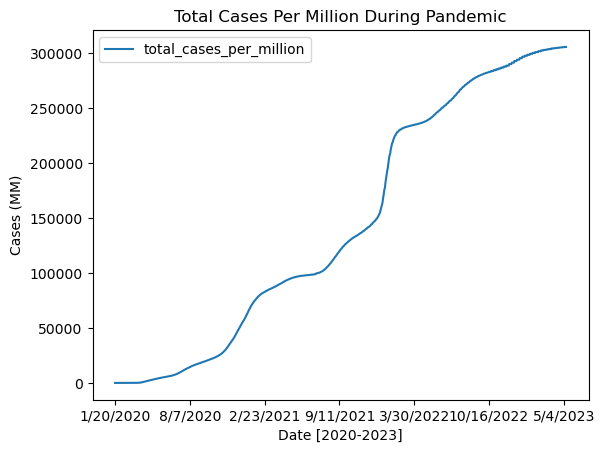

In [8]:
cases_p_million = US_deaths[US_deaths["total_cases_per_million"]>0]
cases_p_million.plot(x="date", y="total_cases_per_million")
plt.xlabel("Date [2020-2023]")
plt.ylabel("Cases (MM)")
plt.title("Total Cases Per Million During Pandemic")
plt.show()

In [9]:
deaths_overall = US_deaths[US_deaths["date"] == "5/10/2023"]["total_deaths"]
print('Total death count:', deaths_overall)

Total death count: 292727    1125209.0
Name: total_deaths, dtype: float64


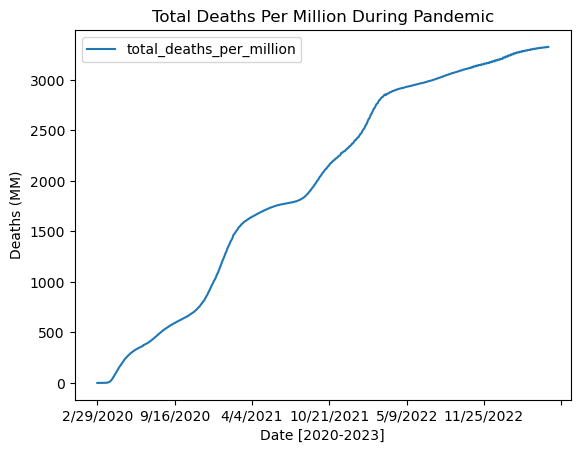

In [10]:
deaths_p_million = US_deaths[US_deaths["total_deaths_per_million"]>0]
deaths_p_million.plot(x="date", y="total_deaths_per_million")
plt.xlabel("Date [2020-2023]")
plt.ylabel("Deaths (MM)")
plt.title("Total Deaths Per Million During Pandemic")
plt.show()

In [11]:
# 1% of COVID-19 cases faced the complication of death.
perc_death = deaths_overall / cases_overall *100
print(perc_death)

292727    1.088804
dtype: float64


In [12]:
# The older population were affected the most.
age_group = covid_deaths_age_gender.groupby("Age Group")["Total Deaths"].sum().sort_values()
print(age_group)

Age Group
1-4 Years               26540
5-14 Years              41070
Under 1 year           137088
15-24 Years            249480
25-34 Years            523756
35-44 Years            780382
45-54 Years           1339080
55-64 Years           3033052
65-74 Years           4727616
75-84 Years           5706474
85 Years and Over     6623110
All Ages             23189398
Name: Total Deaths, dtype: int32


In [13]:
# Males contributed to more COVID-19 deaths than females.
gender = covid_deaths_age_gender.groupby("Sex")["Total Deaths"].sum()
print(gender)

Sex
All Sex    23188523
Female     11000332
Male       12188191
Name: Total Deaths, dtype: int32


## Before and After the Introduction of the Vaccine

### Before the Introduction of the COVID-19 Vaccine

In [14]:
#Total cases had reached 16 million until the vaccination was finally approved.
cases_before_vac = US_deaths.loc[US_deaths.date == "12/14/2020", "total_cases"]
print('Total cases from Jan 2020 to Dec 2020:', cases_before_vac)
deaths_before_vac = US_deaths.loc[US_deaths.date == "12/14/2020", "total_deaths"]
print('Total deaths from Jan 2020 to Dec 2020:', deaths_before_vac)

Total cases from Jan 2020 to Dec 2020: 291850    16229549.0
Name: total_cases, dtype: float64
Total deaths from Jan 2020 to Dec 2020: 291850    308161.0
Name: total_deaths, dtype: float64


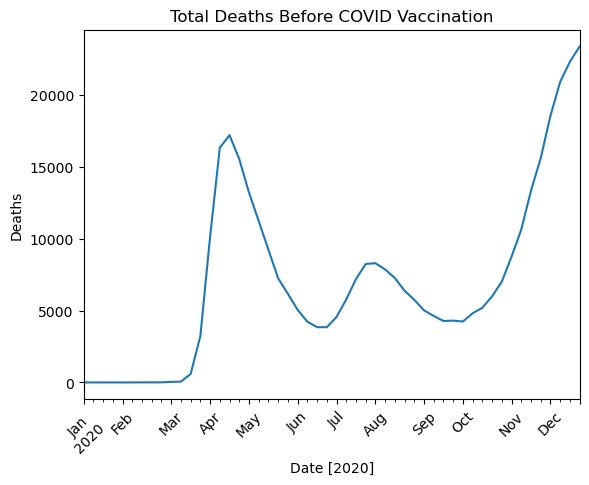

In [15]:
# Mortality took a rise during lockdown (started March 15) and towards the end of 2020.
covid_deaths_age_gender["End Week"] = pd.to_datetime(covid_deaths_age_gender["End Week"])
before_vac_date = covid_deaths_age_gender[(covid_deaths_age_gender["End Week"].dt.year == 2020)]
weekly_deaths = before_vac_date.groupby(["End Week", "Sex", "Age Group"])["COVID-19 Deaths"].sum()
filter_weekly_deaths = weekly_deaths.xs(('All Sex', 'All Ages'), level=('Sex', 'Age Group'))
filter_weekly_deaths.plot()
plt.xlabel("Date [2020]")
plt.ylabel("Deaths")
plt.title("Total Deaths Before COVID Vaccination")
plt.xticks(rotation=45)
plt.show()

In [16]:
# The average growth rate on deaths was 5.4% in 2020.
US_deaths["date"] = pd.to_datetime(US_deaths["date"])
before_vac = US_deaths[(US_deaths["date"] >= "1/3/2020") & (US_deaths["date"] <= "12/14/2020")]
before_vac = before_vac[before_vac["total_deaths"].notna() & (before_vac["total_deaths"] != 0)]
growth_rate_deaths = before_vac["total_deaths"].pct_change() * 100
avg_growth_deaths = growth_rate_deaths.mean()
print("Average Growth Rate of Deaths in 2020:", avg_growth_deaths)

Average Growth Rate of Deaths in 2020: 5.378871041311593


C:\Users\ksjas\AppData\Local\Temp\ipykernel_14524\2612644359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_deaths["date"] = pd.to_datetime(US_deaths["date"])


In [17]:
# ~11% of deaths were related and caused from COVID-19 during 2020.
filter_cd = covid_deaths_age_gender[
    (covid_deaths_age_gender["End Week"].dt.year == 2020) &
    (covid_deaths_age_gender["Sex"] == "All Sex") &
    (covid_deaths_age_gender["Age Group"] == "All Ages")]
total_deaths_2020 = filter_cd["Total Deaths"].sum()
covid_deaths_2020 = filter_cd["COVID-19 Deaths"].sum()
percentage_covid_deaths = (covid_deaths_2020 / total_deaths_2020) * 100
print("Total Deaths in 2020:", total_deaths_2020)
print("COVID-19 Deaths in 2020:", covid_deaths_2020)
print("Percentage of COVID-19 Deaths out of Total Deaths:", percentage_covid_deaths)

Total Deaths in 2020: 3353583
COVID-19 Deaths in 2020: 367923
Percentage of COVID-19 Deaths out of Total Deaths: 10.971042016851827


In [18]:
# The senior age group and male gender faced the most consequences during 2020.
cdeaths_2020_age = before_vac_date.groupby("Age Group")["COVID-19 Deaths"].sum().sort_values(ascending=False)
print(cdeaths_2020_age)
cdeaths_2020_sex = before_vac_date.groupby("Sex")["COVID-19 Deaths"].sum().sort_values(ascending=False)
print(cdeaths_2020_sex)

Age Group
All Ages             735846
85 Years and Over    234404
75-84 Years          202628
65-74 Years          156982
55-64 Years           87188
45-54 Years           35078
35-44 Years           13036
25-34 Years            5044
15-24 Years            1186
5-14 Years              130
Under 1 year            100
1-4 Years                48
Name: COVID-19 Deaths, dtype: int32
Sex
All Sex    735835
Male       399361
Female     336474
Name: COVID-19 Deaths, dtype: int32


C:\Users\ksjas\AppData\Local\Temp\ipykernel_14524\782580729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_deaths["date"] = pd.to_datetime(US_deaths["date"])


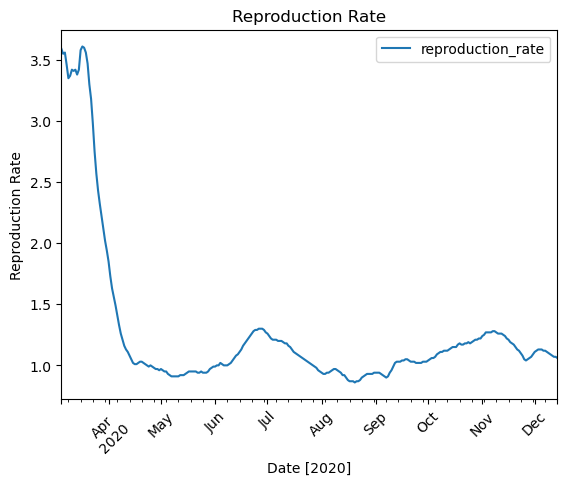

In [19]:
# Reproductivity dropped drastically for the population as the pandemic continued.
US_deaths["date"] = pd.to_datetime(US_deaths["date"])
before_vac = US_deaths[(US_deaths["date"] >= "1/3/2020") & (US_deaths["date"] <= "12/14/2020")]
reprod_rate = before_vac[before_vac["reproduction_rate"]>0]
reprod_rate.plot(x="date", y="reproduction_rate")
plt.xlabel("Date [2020]")
plt.ylabel("Reproduction Rate")
plt.title("Reproduction Rate")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Mortality rate increased as reproductivity stayed low.
before_vac["death_rate"] = before_vac["total_deaths"] / before_vac["population"] * 100

C:\Users\ksjas\AppData\Local\Temp\ipykernel_14524\841011391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_vac["death_rate"] = before_vac["total_deaths"] / before_vac["population"] * 100


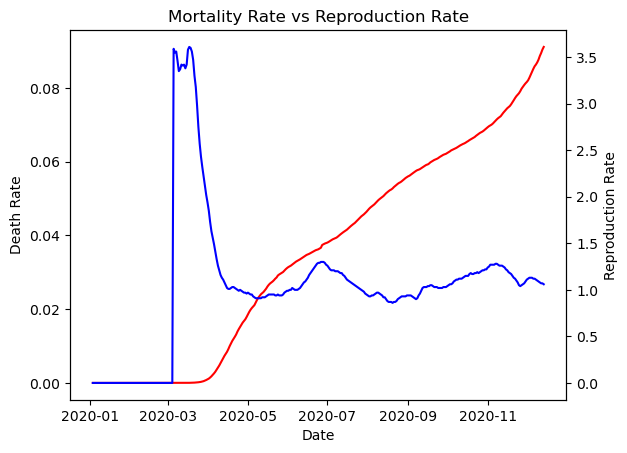

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(before_vac["date"], before_vac["death_rate"], color="red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Death Rate")
ax1.tick_params(axis="y")
ax2 = ax1.twinx()
ax2.plot(before_vac["date"], before_vac["reproduction_rate"], color="blue")
ax2.set_ylabel("Reproduction Rate")
ax2.tick_params(axis="y")
plt.title("Mortality Rate vs Reproduction Rate")
plt.show()

### After the Introduction of the COVID-19 Vaccine

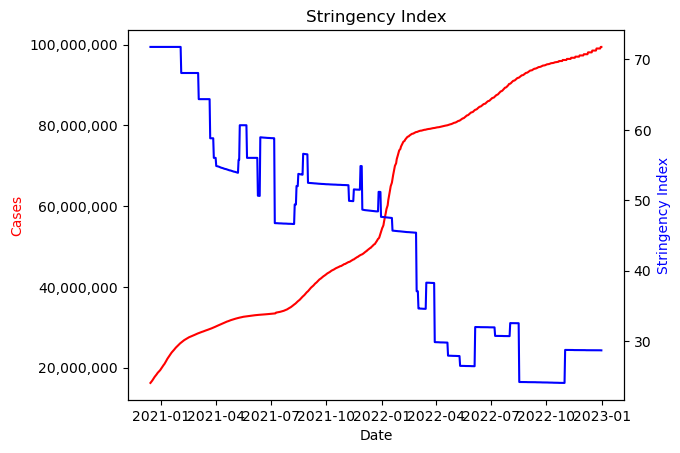

In [25]:
# More public closures as cases rose.
after_vac = US_deaths[(US_deaths["date"] >= "12/14/2020") & (US_deaths["date"] <= "5/15/2023")]
US_vaccines["date"] = pd.to_datetime(US_vaccines["date"])
US_deaths["date"] = pd.to_datetime(US_deaths["date"])
US_deaths = US_deaths[US_deaths["total_cases"]>0]
US_vaccines = US_vaccines[US_vaccines["stringency_index"]>0]

merged_data = pd.merge(after_vac, US_vaccines, on="date", how="inner")

fig, ax1 = plt.subplots()
ax1.plot(merged_data["date"], merged_data["total_cases"], color="red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Cases", color="red")
ax1.tick_params(axis="y")
ax2 = ax1.twinx()
ax2.plot(merged_data["date"], merged_data["stringency_index"], color="blue")
ax2.set_ylabel("Stringency Index", color="blue")
ax2.tick_params(axis="y")
plt.title("Stringency Index")
formatter = FuncFormatter(lambda y, _: '{:,.0f}'.format(y))
ax1.yaxis.set_major_formatter(formatter)
plt.show()

In [26]:
# This led to over 650 million people in the US to be vaccinated and demand is still high.
filter_vacc = US_vaccines[US_vaccines["total_vaccinations"] != 0]
vacc_overall = filter_vacc["total_vaccinations"].iloc[-1]
print("Total vaccinated count:", vacc_overall)

Total vaccinated count: 666952241.0


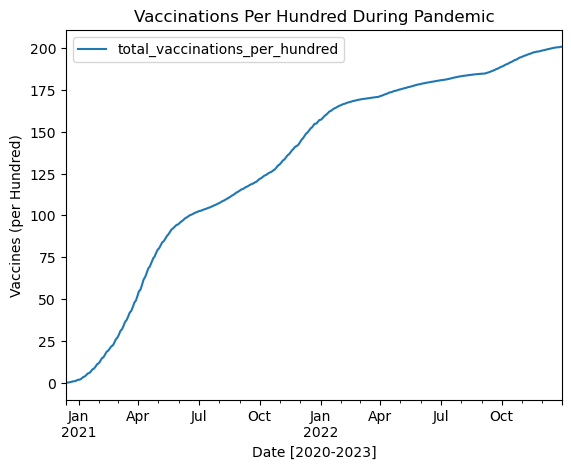

In [27]:
vac_overall = US_vaccines[US_vaccines["total_vaccinations_per_hundred"]>0]
vac_overall.plot(x="date", y="total_vaccinations_per_hundred")
plt.xlabel("Date [2020-2023]")
plt.ylabel("Vaccines (per Hundred)")
plt.title("Vaccinations Per Hundred During Pandemic")
plt.show()

In [28]:
# There were 817,048 additional deaths from 2021-2023.
deaths_overall = US_deaths[US_deaths["date"] == "5/10/2023"]["total_deaths"].values[0]
deaths_before_vac = US_deaths[US_deaths["date"] == "12/14/2020"]["total_deaths"].values[0]
deaths_after_vac = deaths_overall - deaths_before_vac
print("Total deaths after 2020:", deaths_after_vac)

Total deaths after 2020: 817048.0


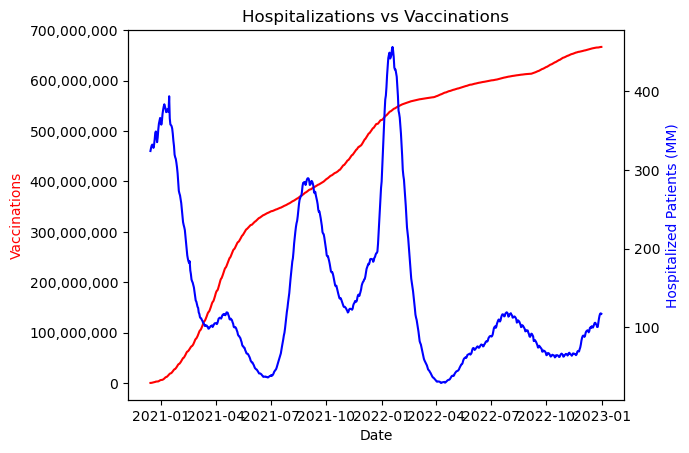

In [29]:
# Hospitalization cases and mortality decreased as more of the population became vaccinated.
US_deaths = US_deaths[US_deaths["total_deaths_per_million"]>0]
US_vaccines = US_vaccines[US_vaccines["total_vaccinations"]>0]

fig, ax1 = plt.subplots()
ax1.plot(merged_data["date"], merged_data["total_vaccinations"], color="red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Vaccinations", color="red")
ax1.tick_params(axis="y")
ax2 = ax1.twinx()
ax2.plot(merged_data["date"], merged_data["hosp_patients_per_million"], color="blue")
ax2.set_ylabel("Hospitalized Patients (MM)", color="blue")
ax2.tick_params(axis="y")
plt.title("Hospitalizations vs Vaccinations")
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
plt.show()

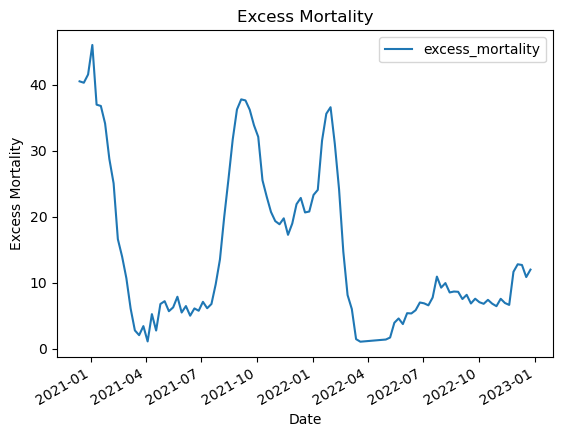

In [34]:
excess_mortality = US_vaccines[US_vaccines["excess_mortality"]>0]
excess_mortality.plot(x="date", y="excess_mortality")
plt.xlabel("Date")
plt.ylabel("Excess Mortality")
plt.title("Excess Mortality")
plt.show()

In [31]:
# The growth rate of deaths dropped from 5.4% to 0.1% with the help of the vaccine.
after_vac = after_vac[after_vac["total_deaths"].notna() & (after_vac["total_deaths"] != 0)]
growth_rate_deaths_after = after_vac["total_deaths"].pct_change() * 100
avg_growth_deaths_after = growth_rate_deaths_after.mean()
print("Average Growth Rate of Deaths 2021-2023:", avg_growth_deaths_after)

Average Growth Rate of Deaths 2021-2023: 0.14799507273788903


In [32]:
# Mortality rate decreased year over year as the population became vaccinated.
US_deaths["year"] = pd.to_datetime(US_deaths["date"]).dt.year

yearly_death_rates = {}
for year in range(2020, 2024):
    year_data = US_deaths[US_deaths["year"] == year]
    death_rate = year_data["total_deaths"] / year_data["population"] * 100
    yearly_death_rates[year] = death_rate.mean()

yearly_death_rate_diffs = {}
years = list(yearly_death_rates.keys())
for i in range(1, len(years)):
    diff = yearly_death_rates[years[i]] - yearly_death_rates[years[i - 1]]
    yearly_death_rate_diffs[years[i]] = diff

for year, diff in yearly_death_rate_diffs.items():
    print(f"Mortality rate for {year}: {diff}")

Mortality rate for 2021: 0.1360189911483175
Mortality rate for 2022: 0.11418329334419558
Mortality rate for 2023: 0.032096977438361596


In [43]:
# Mortality and vaccinations prove to have a strong positive correlation.
correlation = US_vaccines["total_vaccinations"].corr(US_deaths["total_deaths"])
print("Correlation between vaccinations and mortality:", correlation)

Correlation between vaccinations and mortality: 0.9653410421831126
